<a href="https://colab.research.google.com/github/nascimento-luciano/Artificial-Intelligence/blob/master/classificacao_de_imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**UNIVERSIDADE FEDERAL DO AGRESTE DE PERNAMBUCO**

**Redes Neurais/Visão Computacional - Prof. Dr. Luis F. Alves Pereira**

---
**Conteúdo:**

* O que o computador enxerga?
* Classificação de imagens usando MLP/Fully Connected Nets
* Convoluções e extração de características
* Camadas convolucionais

---


#1. O que o computador enxerga?

Inicialmente, vamos carregar a base de dados MNIST que contém uma coleção de digitos manuscritos:

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))


11501568/11490434 [==============================] - 0s 0us/step
MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


Visualizando uma determinada matriz 2D do conjunto de treinamento através funcionalidades dos dispositivos gráficos de nossa máquina, temos:

Visualização de matriz 2D através de dispositivos gráficos:


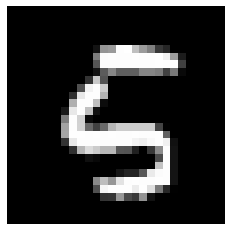

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

sample_nr = 34800
im = np.squeeze(X_train[sample_nr,:,:])
#print(im)
print("Visualização de matriz 2D através de dispositivos gráficos:")
plt.imshow(im, cmap='gray')
plt.axis('Off')
plt.show()

Podemos também visualizar todos os elementos da matriz individualmente como estão armazenados em memória:

In [ ]:
print("Visualização elemento a elemento da matriz como armazenada em memória:")
for ii in range(28):
  for jj in range(28):
    print("{}".format(str(im[ii,jj]).zfill(3)),end =" ")
  print("\n")

Visualização elemento a elemento da matriz como armazenada em memória:
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 

000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 

000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 

000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 

000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 

000 000 000 000 000 000 000 000 000 000 000 019 149 155 253 255 192 155 128 056 038 000 000 000 000 000 000 000 

000 000 000 000 000 000 000 000 000 000 000 125 253 254 253 253 254 253 253 254 240 156 028 000 000 000 000 000 

000 000 000 000 000 000 000 000 000 000 000 085 253 253 253 253 253 253 253 254 253 254 064 000 000 000 000 000 

000 000 000 000 0

Neste cenário, o desafio está posto: como manipular todos esses números armazenados em memória com a finalidade de identificar características na imagem?

#2. Classificação de imagens usando MLP/Fully Connected Nets?

O objetivo da classificação de imagens é associar cada imagem de entrada a uma tag/classe do problema.

No contexto de reconhecimento de digitos manuscritos, temos 10 classes - uma para cada dígito decimal entre 0 e 9. Sendo assim, nosso modelo para classificação irá operar conforme o diagrama:

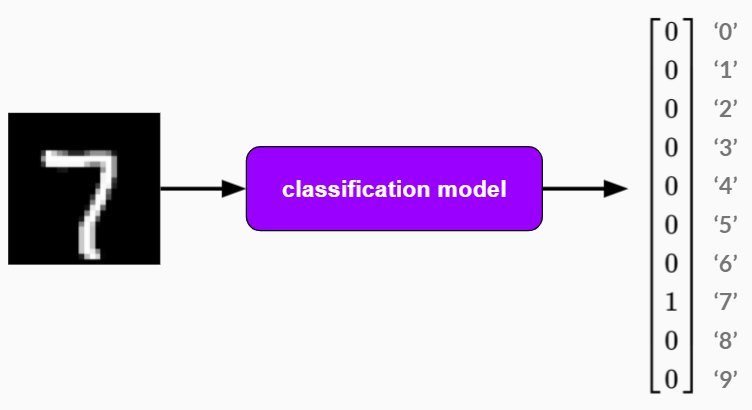

Uma primeira estratégia para realizar esta classificação consiste em associar cada pixel das imagens de entrada a um neurônio da camada de entrada neurônio da entrada de uma rede Fully-Connected/Multilayer Perceptron:

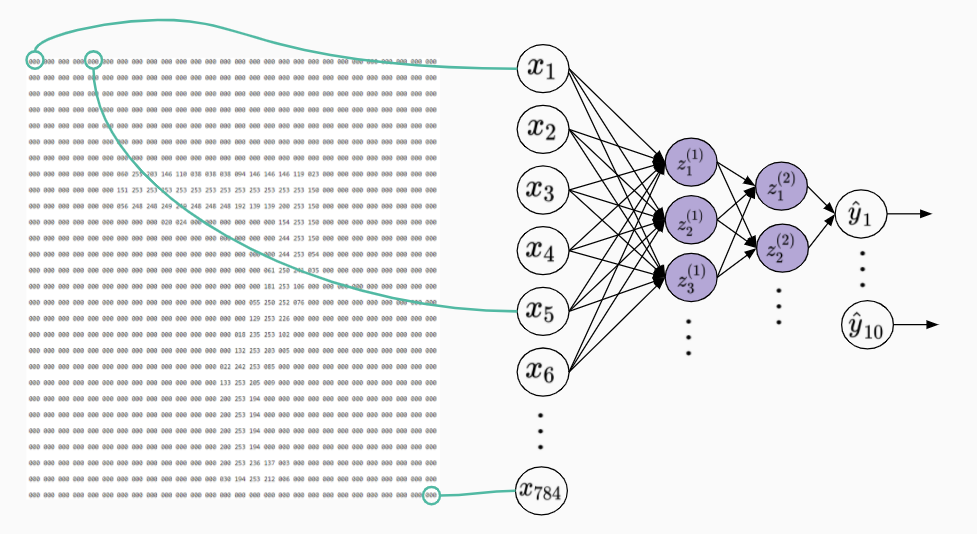

O código dessa estratégia é apresentado a seguir:

In [ ]:
from tensorflow.keras.utils import to_categorical

class MyFirstFCN(tf.keras.Model):

  def __init__(self):
    super(MyFirstFCN, self).__init__()
    self.dense1 = tf.keras.layers.Dense(256, activation=tf.nn.relu)
    self.dense2 = tf.keras.layers.Dense(64, activation=tf.nn.relu)
    self.dense3 = tf.keras.layers.Dense(10, activation=tf.nn.sigmoid)

  def call(self, inputs):
    x = self.dense1(inputs)
    x = self.dense2(x)
    x = self.dense3(x)
    return x

model = MyFirstFCN()

X_train = X_train/255. #[0-1]
X_train = tf.reshape(X_train, [60000,784])
Y_train = to_categorical(Y_train)


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Optimizer
              loss=tf.keras.losses.BinaryCrossentropy(),# Loss function to minimize
              metrics=[tf.keras.metrics.CategoricalAccuracy(),])  # List of metrics to monitor

history = model.fit(X_train,Y_train, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1202 - categorical_accuracy: 0.8329
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0496 - categorical_accuracy: 0.9307
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0374 - categorical_accuracy: 0.9468
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0304 - categorical_accuracy: 0.9572
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0256 - categorical_accuracy: 0.9646
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0220 - categorical_accuracy: 0.9695
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0193 - categorical_accuracy: 0.9736
Epoch 8/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0171 - categorical_accuracy: 0.9769
Epoch 9/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0154 - cat

Em seguida, podemos utilizar o modelo treinado para predizer a classe associada as imagens do conjunto de testes!

TEST IMAGE:


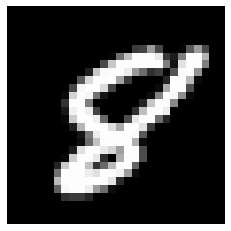

NETWORK OUTPUT:
tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]], shape=(1, 10), dtype=float32)
PREDICTED NUMBER: 8


In [ ]:
import random

k = random.randint(0,10000)
sample = X_test[k,:,:]

print("TEST IMAGE:")
plt.imshow(sample, cmap='gray')
plt.axis('Off')
plt.show()

sample_vct = tf.reshape(sample,[1, 784])

out = model(sample_vct)

print("NETWORK OUTPUT:")
print(out)


print("PREDICTED NUMBER: {}".format(tf.math.argmax(out,axis=1).numpy()[0]))

Apesar de funcional, essa solução trivial usando MLP/Fully-Connected Nets não escala para problemas mais complexos pois:
 * Número impraticável de pesos para classificar imagens de tamanho significativo;
 * Elevado consumo de memória;
 * Solução apresentada não é invariante a translação e rotação;
 

#3. Convoluções e extrações de características

A operação de convolução está intrinsecamente associada a operação de correlação.

No código abaixo, criamos 3 patches de imagens $5\times5$. Logo em seguida, convoluímos todos os patches entre si, e apresentamos os resultados obtidos. 

Veja que os valores obtidos são maiores entre patches com alguma similaridade entre seus pixels.

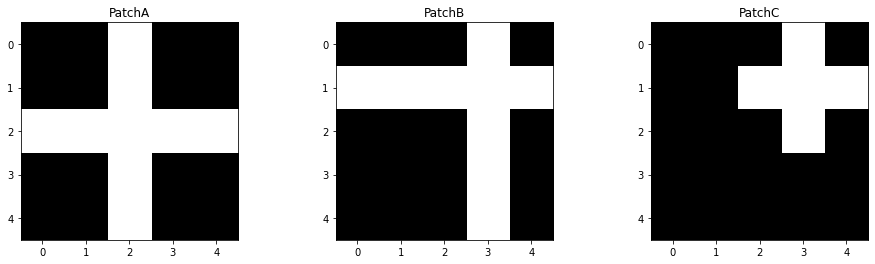

PatchA * Patch A: 9.0
PatchA * Patch B: 2.0
PatchA * Patch C: 2.0
PatchB * Patch B: 9.0
PatchB * Patch C: 5.0
PatchC * Patch C: 5.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

patchA = np.array([[0,0,1,0,0],[0,0,1,0,0],[1,1,1,1,1],[0,0,1,0,0],[0,0,1,0,0]], dtype=np.float32)
patchB = np.array([[0,0,0,1,0],[1,1,1,1,1],[0,0,0,1,0],[0,0,0,1,0],[0,0,0,1,0]], dtype=np.float32)
patchC = np.array([[0,0,0,1,0],[0,0,1,1,1],[0,0,0,1,0],[0,0,0,0,0],[0,0,0,0,0]], dtype=np.float32)


fig = plt.gcf()
fig.set_size_inches(16, 4)

plt.subplot(1,3,1)
plt.imshow(patchA, cmap='gray')
plt.title("PatchA")

plt.subplot(1,3,2)
plt.imshow(patchB, cmap='gray')
plt.title("PatchB")

plt.subplot(1,3,3)
plt.imshow(patchC, cmap='gray')
plt.title("PatchC")
plt.show()

def conv(a,b):
  return np.sum(np.multiply(a,b),axis=(0,1))

print("PatchA * Patch A: {}".format(conv(patchA,patchA)))
print("PatchA * Patch B: {}".format(conv(patchA,patchB)))
print("PatchA * Patch C: {}".format(conv(patchA,patchC)))
print("PatchB * Patch B: {}".format(conv(patchB,patchB)))
print("PatchB * Patch C: {}".format(conv(patchB,patchC)))
print("PatchC * Patch C: {}".format(conv(patchC,patchC)))

Agora, veja o que aplicamos o patch C (cruz branca no canto superior esquerdo da janela $5\times5$) a todos os pixels de uma imagem $30\times30$.

A região da convolução com maior sinal de resposta é visivelmente a vizinhança em que a distribuição de pixels brancos mais se assemelha ao encontrado no patch C! A matriz resultante de uma operação de convolução indica portanto as áreas da imagem em que um determinado padrão de pixels pode ser encontrado.


25
13


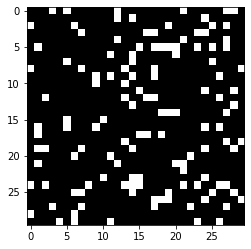

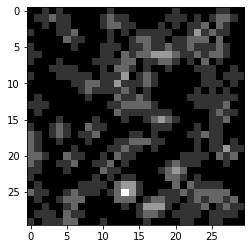

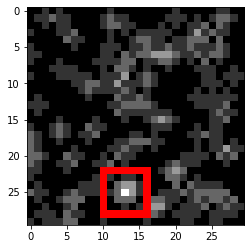

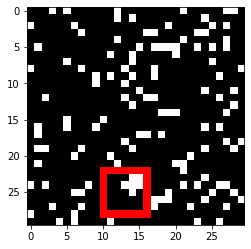

In [ ]:
import tensorflow as tf

img = np.array(np.random.rand(30,30) > 0.85, dtype=np.float32)

box = np.zeros((1,30,30,1))
box[0,:,:,0] = img


img_tf = tf.constant(box, dtype=tf.float32)
a_tf = tf.constant(patchC, dtype=tf.float32)
a_tf = tf.reshape(a_tf, [5,5,1,1])

output = tf.nn.conv2d(img_tf,a_tf,strides=[1,1,1,1],padding='SAME')
out_np = output.numpy()

print(np.argmax(out_np[0,:,:,0])//30)
print(np.argmax(out_np[0,:,:,0])%30)

plt.imshow(img, cmap='gray')
plt.figure()
plt.imshow(out_np[0,:,:,0], cmap='gray')


def draw_square(im,h,w):
    
    out_im = np.reshape(im, [30,30,1])
    out_im = np.repeat(out_im,3,axis=-1)
    
    for c in range(3):
      for u in [-3,3]:
        for v in [-3,-2,-1,0,1,2,3]:
            out_im[h+u,w+v,c] = c < 1

      for v in [-3,3]:
        for u in [-3,-2,-1,0,1,2,3]:
            out_im[h+u,w+v,c] = c < 1

    return out_im

out = draw_square(out_np[0,:,:,0]/np.max(out_np[0,:,:,0]),np.argmax(out_np[0,:,:,0])//30,np.argmax(out_np[0,:,:,0])%30)
plt.figure()
plt.imshow(out)
img_mark = draw_square(img,np.argmax(out_np[0,:,:,0])//30,np.argmax(out_np[0,:,:,0])%30)
plt.figure()
plt.imshow(img_mark)
plt.show()

#4. Camadas convolucionais

Já sabemos que os neurônios das camadas densamente conectadas processam os dados de entrada $X$ através da operação $g(\omega_0+XW^T)$. De maneira similar, para uma dada imagem 2D de entrada $X$, uma camada convolucional promove a operação $g(\omega_0 + X \circledast W)$ em que $\circledast$ refere-se à operação de convolução e $W$ contém $n$ filtros/patches.

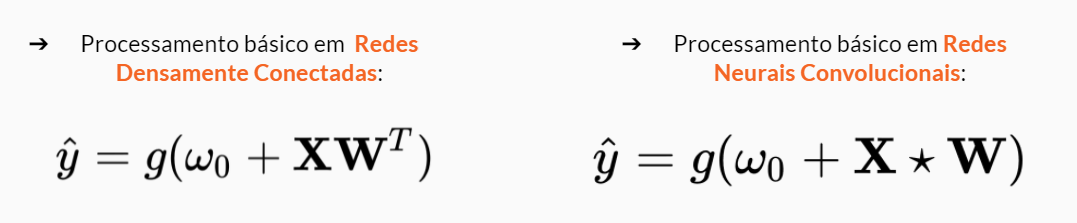

O código a seguir cria na variável `conv_layer` uma camada convolucional utilizando o framework Keras. Veja que essa camada é formada por três filtros convolucionais de tamanho $3\times3$ cada.

Desta feita, cada um dos três filtros é aplicado às imagens contidas no tensor de entrada.

Por fim, as dimensões dos tensores de entrada e saída em uma camada convolucional são dadas a seguir#

**ENTRADA:** $[B,M,N,C]$ onde $B$ é o tamanho do batch, $M$ é o número de linhas da imagem, $N$ é o número de colunas da imagem, e $C$ é o índice de canais da imagem (para o caso de imagens coloridas)

**SAIDA:** $[B,M,N,F]$ onde $F$ é o número de filtros usados na camada.

No código a seguir, é possível visualizar cada um das três imagens geradas pelos filtros da camada antes e depois do uso da função de ativação ReLu.

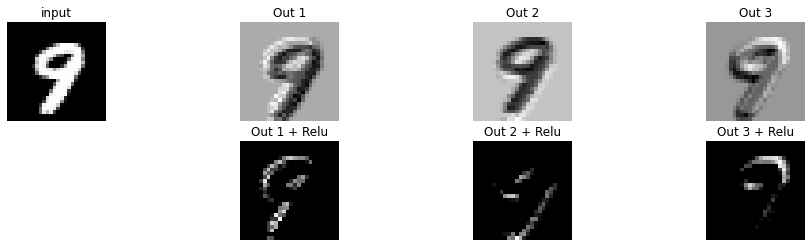

In [ ]:
import random

k = random.randint(0,10000)
sample = X_test[k,:,:]/255.

sample_tf = tf.constant(sample, dtype=tf.float32)
sample_tf = tf.reshape(sample_tf,[1,28,28,1])

conv_layer = tf.keras.layers.Conv2D(filters=3,kernel_size=(3,3), strides=(1,1))
out = (conv_layer(sample_tf))
out_relu = tf.nn.relu(out)

fig = plt.gcf()
fig.set_size_inches(16, 4)

plt.subplot(2,4,1)
plt.imshow(sample_tf[0,:,:,0], cmap='gray')
plt.axis('Off')
plt.title("input")

plt.subplot(2,4,2)
plt.imshow(out[0,:,:,0], cmap='gray')
plt.axis('Off')
plt.title("Out 1")

plt.subplot(2,4,3)
plt.imshow(out[0,:,:,1], cmap='gray')
plt.axis('Off')
plt.title("Out 2")

plt.subplot(2,4,4)
plt.imshow(out[0,:,:,2], cmap='gray')
plt.axis('Off')
plt.title("Out 3")

plt.subplot(2,4,6)
plt.imshow(out_relu[0,:,:,0], cmap='gray')
plt.axis('Off')
plt.title("Out 1 + Relu")

plt.subplot(2,4,7)
plt.imshow(out_relu[0,:,:,1], cmap='gray')
plt.axis('Off')
plt.title("Out 2 + Relu")

plt.subplot(2,4,8)
plt.imshow(out_relu[0,:,:,2], cmap='gray')
plt.axis('Off')
plt.title("Out 3 + Relu")
plt.show()

##Próximos passos...


Vamos montar nossa primeira rede convolucional para classificar gatoes e cachorros [aqui](https://colab.research.google.com/drive/1Gma57N7rUy1RdYtLRtPlPHpjd_iygaIT?usp=sharing) 